In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import scipy
import pickle

import sys
import os

project_path = os.path.expanduser('~/repos/laplace_operator_metric_graph/')
sys.path.append(project_path)

from construct_graph.graph import Graph, Flat
import construct_graph
from calculations.helper_functions import style_plot
import solve_laplace_operator

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [69]:
# Patch sizes
nums_Vs_params = (np.linspace(9**0.5, 91**0.5, 21)**2)[:13]

# Number of patches (patch translations) to get statistics for patch size
translate_params = np.array(list(16 * np.ones(8)) + list(8 * np.ones(2)) + list(4 * np.ones(3))).astype(int)

In [67]:
full_tensors = []

for en, (num_translations, nums_Vs_param) in enumerate(zip(translate_params, nums_Vs_params)):

    full_tensors.append([])

    print(f"graph {en} / {len(nums_Vs_params - 1)}")
    print(num_translations)
    print("\n\n")

    np.random.seed(0)

    for translation in range(num_translations):

        g = construct_graph.patch_graph.Aperiodic_Monotile(nums_Vs_param, translation * np.array([1, 1]))
        g = construct_graph.patch_graph.Patch(g)
        print(g.num_Vs, translation)

        print(f"\nnum_Vs = {g.num_Vs}\n")
        eq = construct_graph.patch_graph.Cell_Problem(g)
        xi = eq.solve_corrector_equation()
        _, Q, T = eq.construct_homogenized_tensor(xi)

        full_tensors[-1].append((g.num_Vs, translation, Q, T))

graph 0 / 13
16



421 0

num_Vs = 421

410 1

num_Vs = 410

417 2

num_Vs = 417

420 3

num_Vs = 420

406 4

num_Vs = 406

419 5

num_Vs = 419

417 6

num_Vs = 417

422 7

num_Vs = 422

423 8

num_Vs = 423

425 9

num_Vs = 425

420 10

num_Vs = 420

404 11

num_Vs = 404

413 12

num_Vs = 413

417 13

num_Vs = 417

411 14

num_Vs = 411

427 15

num_Vs = 427

graph 1 / 13
16



637 0

num_Vs = 637

621 1

num_Vs = 621

616 2

num_Vs = 616

629 3

num_Vs = 629

618 4

num_Vs = 618

621 5

num_Vs = 621

632 6

num_Vs = 632

642 7

num_Vs = 642

621 8

num_Vs = 621

640 9

num_Vs = 640

628 10

num_Vs = 628

622 11

num_Vs = 622

634 12

num_Vs = 634

642 13

num_Vs = 642

621 14

num_Vs = 621

624 15

num_Vs = 624

graph 2 / 13
16



908 0

num_Vs = 908

887 1

num_Vs = 887

902 2

num_Vs = 902

913 3

num_Vs = 913

894 4

num_Vs = 894

915 5

num_Vs = 915

908 6

num_Vs = 908

914 7

num_Vs = 914

904 8

num_Vs = 904

920 9

num_Vs = 920

912 10

num_Vs = 912

913 11

num_Vs = 913

906 1

In [98]:
nums_Vs = []
norms = []

for data in full_tensors:

    nums_Vs.append(np.mean([i[0] for i in data]))
    norms.append(np.array([np.linalg.norm(i[-2] / i[-1] - np.trace(i[-2] / i[-1]) / 2 * np.eye(2)) / np.linalg.norm(np.trace(i[-2] / i[-1]) / 2 * np.eye(2)) for i in data]))


nums_Vs = np.round(nums_Vs).astype(int)

In [100]:
x = nums_Vs
y = np.array([np.mean(i) for i in norms])
dy = np.array([np.std(i) for i in norms])
y_ratio_upper = y * (1 + dy / y)  # Equivalent to y + dy
y_ratio_lower = y / (1 + dy / y)  # Avoids y - dy < 0
y_err_upper = (y_ratio_upper - y)
y_err_lower = (y - y_ratio_lower)

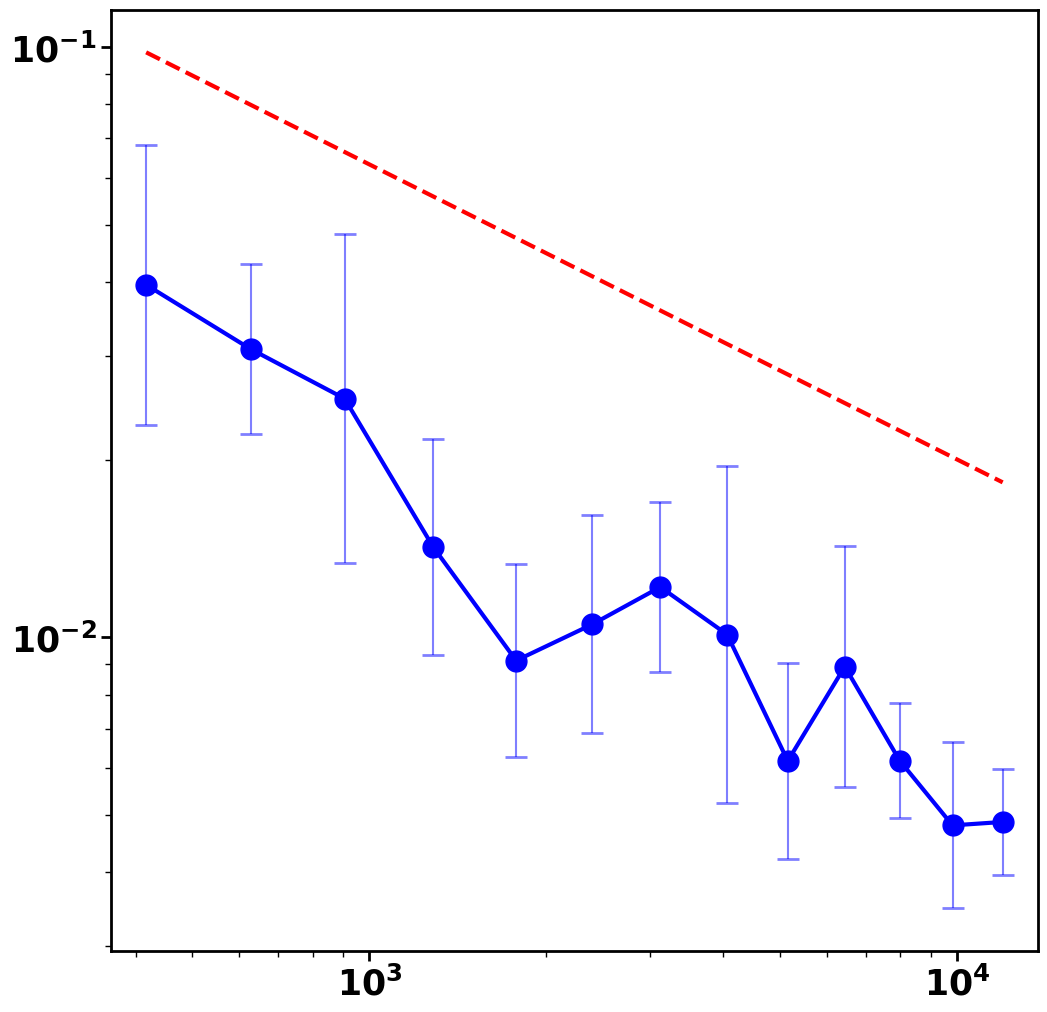

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

eigenvalue_linewidth = 3
eigenvalue_markersize = 15

ax.errorbar(x, y, yerr=[y_err_lower, y_err_upper], capsize=8, capthick=2, c='b', alpha=0.5, zorder=0)
ax.loglog(x, y, 'o-', c='b', linewidth=eigenvalue_linewidth, markersize=eigenvalue_markersize)

ax.loglog(x, x**(-0.5) * 2, '--', c='r', linewidth=eigenvalue_linewidth)

x_min, x_max = x.min(), x.max()
ax.set_xlim(10**(np.log10(x_min) - 0.06), 10**(np.log10(x_max) + 0.06))

style_plot(fig, ax, aspect=None)

plt.show()